In [2]:
import pandas as pd

# Load the dataset
file_path = "vmCloud_data_50k.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   vm_id                      44907 non-null  object 
 1   timestamp                  44850 non-null  object 
 2   cpu_usage                  45045 non-null  float64
 3   memory_usage               45003 non-null  float64
 4   network_traffic            44943 non-null  float64
 5   power_consumption          45056 non-null  float64
 6   num_executed_instructions  45025 non-null  float64
 7   execution_time             45069 non-null  float64
 8   energy_efficiency          44921 non-null  float64
 9   task_type                  44869 non-null  object 
 10  task_priority              44986 non-null  object 
 11  task_status                45007 non-null  object 
dtypes: float64(7), object(5)
memory usage: 4.6+ MB


(None,
                                   vm_id            timestamp  cpu_usage  \
 0  c5215826-6237-4a33-9312-72c1df909881  2023-01-25 09:10:54  54.881350   
 1  29690bc6-1f34-403b-b509-a1ecb1834fb8  2023-01-26 04:46:34  71.518937   
 2  2e55abc3-5bad-46cb-b445-a577f5e9bf2a  2023-01-13 23:39:47        NaN   
 3  e672e32f-c134-4fbc-992b-34eb63bef6bf  2023-02-09 11:45:49  54.488318   
 4  f38b8b50-6926-4533-be4f-89ad11624071  2023-06-14 08:27:26  42.365480   
 
    memory_usage  network_traffic  power_consumption  \
 0     78.950861       164.775973         287.808986   
 1     29.901883              NaN         362.273569   
 2     92.709195       203.674847         231.467903   
 3     88.100960              NaN         195.639954   
 4           NaN              NaN         359.451537   
 
    num_executed_instructions  execution_time  energy_efficiency task_type  \
 0                     7527.0       69.345575           0.553589   network   
 1                     5348.0       41.39

In [3]:
# Calculate the percentage of missing values for each column
missing_values = df.isnull().sum() / len(df) * 100

# Display missing values percentage
missing_values


vm_id                        10.186
timestamp                    10.300
cpu_usage                     9.910
memory_usage                  9.994
network_traffic              10.114
power_consumption             9.888
num_executed_instructions     9.950
execution_time                9.862
energy_efficiency            10.158
task_type                    10.262
task_priority                10.028
task_status                   9.986
dtype: float64

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Drop non-essential columns
df_cleaned = df.drop(columns=['vm_id', 'timestamp'])

# Fill missing numerical values with median
numerical_cols = ['cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption',
                  'num_executed_instructions', 'execution_time', 'energy_efficiency']
for col in numerical_cols:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Fill missing categorical values with mode
categorical_cols = ['task_type', 'task_priority', 'task_status']
for col in categorical_cols:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

# Verify that there are no missing values left
df_cleaned.isnull().sum()


cpu_usage                    0
memory_usage                 0
network_traffic              0
power_consumption            0
num_executed_instructions    0
execution_time               0
energy_efficiency            0
task_type                    0
task_priority                0
task_status                  0
dtype: int64

In [7]:
# Summary statistics of numerical features
df_cleaned.describe()


,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04
mean,49.863626,49.961863,499.993124,249.580363,4981.140560,49.906386,5.029189e-01
std,27.437756,27.470104,274.111387,136.843614,2739.954924,27.335712,2.740935e-01
min,0.007245,0.001615,0.006439,0.012858,0.000000,0.002654,3.075787e-07
25%,27.617290,27.696845,279.336234,139.476761,2743.000000,27.647779,2.791290e-01
50%,49.957065,50.017401,499.540784,249.226804,4979.000000,50.050698,5.050010e-01
75%,72.159992,72.387107,722.161305,359.982344,7212.000000,72.000015,7.256709e-01
max,99.997795,99.992362,999.987020,499.970250,9999.000000,99.998300,9.999793e-01


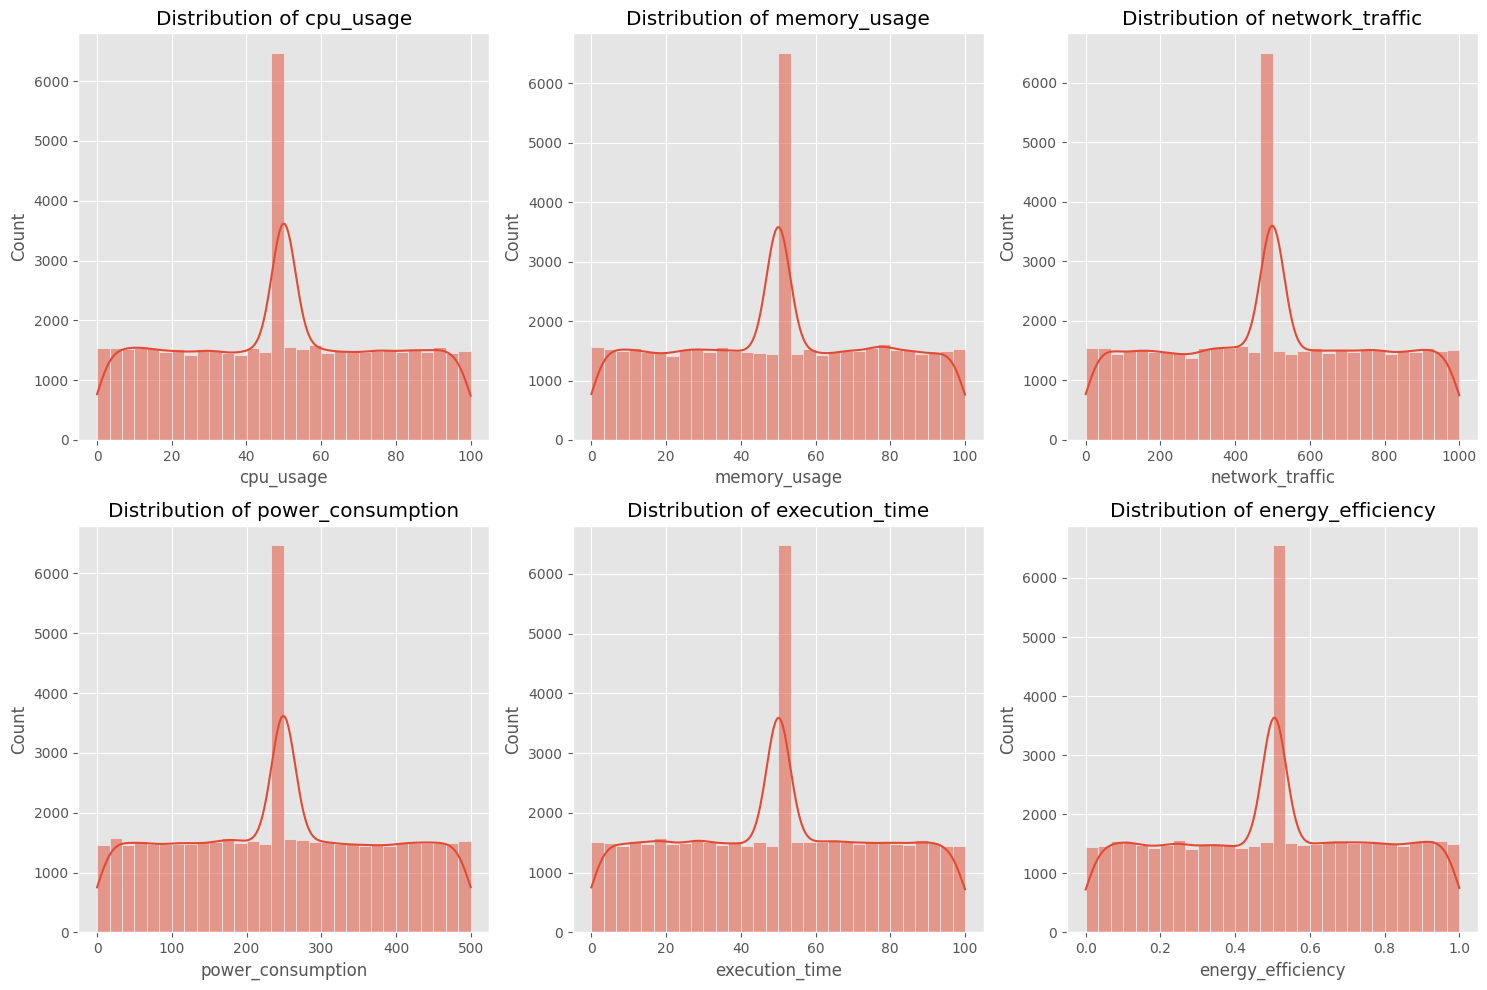

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use("ggplot")

# Define numerical features to visualize
num_features = ['cpu_usage', 'memory_usage', 'network_traffic', 
                'power_consumption', 'execution_time', 'energy_efficiency']

# Plot histograms
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.histplot(df_cleaned[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


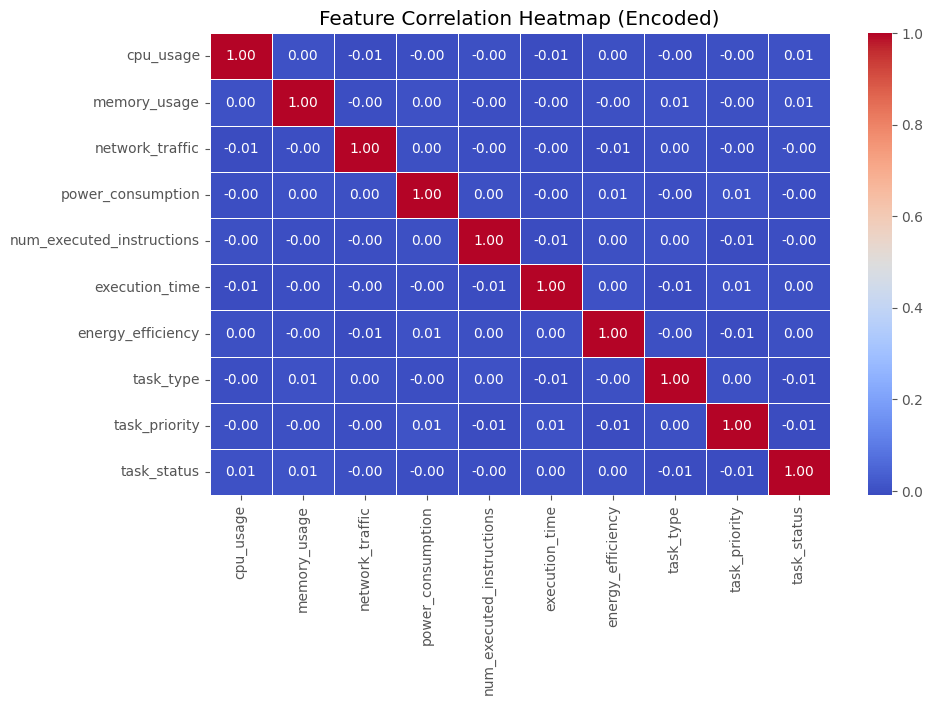

In [10]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_cols = ['task_type', 'task_priority', 'task_status']

for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # Store label encoders for future reference

# Recompute correlation matrix after encoding
corr_matrix_encoded = df_cleaned.corr()

# Plot heatmap again
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_encoded, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Encoded)")
plt.show()


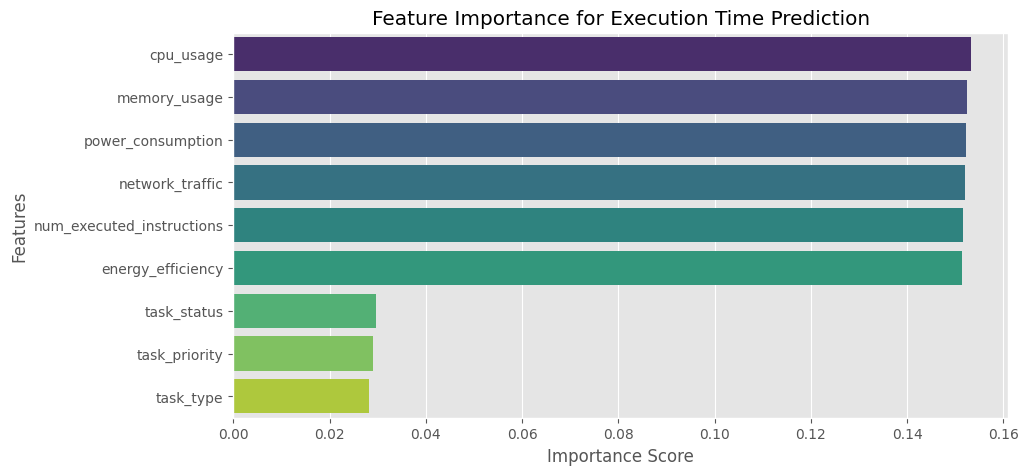

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Prepare feature set (X) and target variable (y: execution_time)
X = df_cleaned.drop(columns=['execution_time'])
y = df_cleaned['execution_time']

# Train a Random Forest model with reduced estimators for speed
rf = RandomForestRegressor(n_estimators=20, random_state=42)
rf.fit(X, y)

# Extract feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")
plt.title("Feature Importance for Execution Time Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=20, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=50, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred)
    }

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T

# Display results
results_df


,MAE,MSE,R² Score
Linear Regression,22.483562,747.806787,-0.000360
Ridge Regression,22.483559,747.806753,-0.000360
Random Forest,23.303611,790.626172,-0.057641
Gradient Boosting,22.491808,747.746896,-0.000280


In [14]:
from sklearn.preprocessing import StandardScaler
from itertools import combinations

# Create interaction features (pairwise multiplication of top features)
important_features = ['cpu_usage', 'memory_usage', 'power_consumption', 'num_executed_instructions']
for f1, f2 in combinations(important_features, 2):
    df_cleaned[f"{f1}_x_{f2}"] = df_cleaned[f1] * df_cleaned[f2]

# Normalize the dataset (excluding categorical variables)
scaler = StandardScaler()
numeric_cols = df_cleaned.columns.difference(['task_type', 'task_priority', 'task_status'])

df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])

# Split data again with engineered features
X_new = df_cleaned.drop(columns=['execution_time'])
y_new = df_cleaned['execution_time']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Verify new feature additions
X_train_new.head()


,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,energy_efficiency,task_type,task_priority,task_status,cpu_usage_x_memory_usage,cpu_usage_x_power_consumption,cpu_usage_x_num_executed_instructions,memory_usage_x_power_consumption,memory_usage_x_num_executed_instructions,power_consumption_x_num_executed_instructions
39087,-0.166308,0.973689,-0.490231,0.671144,1.341225,1.340037,2,2,0,0.469887,0.293413,0.692184,1.316958,2.003338,1.651058
30893,-0.820150,1.245267,-0.124184,1.732265,0.330249,1.707019,0,1,2,-0.092053,0.085606,-0.419889,2.736091,1.190151,1.563232
45278,-1.408951,-0.311842,-1.559809,-0.644329,1.397431,-0.344737,0,1,2,-0.973813,-1.025409,-0.719830,-0.557589,0.559545,0.172090
16398,0.088739,0.788705,1.151456,-1.732265,-0.155895,-0.297752,0,0,0,0.599841,-1.136764,-0.048736,-1.113357,0.373804,-1.144454
13653,1.472101,1.757065,-1.653840,0.255243,-1.208477,-1.180117,1,1,2,3.054444,1.279453,-0.469558,1.485755,-0.408400,-0.741223


In [15]:
# Train models again with new features
updated_results = {}
for name, model in models.items():
    model.fit(X_train_new, y_train_new)
    y_pred_new = model.predict(X_test_new)
    
    updated_results[name] = {
        "MAE": mean_absolute_error(y_test_new, y_pred_new),
        "MSE": mean_squared_error(y_test_new, y_pred_new),
        "R² Score": r2_score(y_test_new, y_pred_new)
    }

# Convert results to DataFrame for better visualization
updated_results_df = pd.DataFrame(updated_results).T

# Display updated results
updated_results_df


,MAE,MSE,R² Score
Linear Regression,0.822713,1.001082,-0.000665
Ridge Regression,0.822713,1.001082,-0.000665
Random Forest,0.854042,1.058023,-0.057582
Gradient Boosting,0.823405,1.001748,-0.001331


In [16]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# Perform Grid Search for Random Forest
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
rf_grid_search.fit(X_train_new, y_train_new)

# Perform Grid Search for Gradient Boosting
gb_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
gb_grid_search.fit(X_train_new, y_train_new)

# Best parameters
best_rf_params = rf_grid_search.best_params_
best_gb_params = gb_grid_search.best_params_

best_rf_params, best_gb_params


({'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100},
 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50})

In [17]:
# Train optimized models
best_rf = RandomForestRegressor(**best_rf_params, random_state=42)
best_gb = GradientBoostingRegressor(**best_gb_params, random_state=42)

# Fit the models
best_rf.fit(X_train_new, y_train_new)
best_gb.fit(X_train_new, y_train_new)

# Predict on test set
y_pred_rf = best_rf.predict(X_test_new)
y_pred_gb = best_gb.predict(X_test_new)

# Evaluate performance
optimized_results = {
    "Optimized Random Forest": {
        "MAE": mean_absolute_error(y_test_new, y_pred_rf),
        "MSE": mean_squared_error(y_test_new, y_pred_rf),
        "R² Score": r2_score(y_test_new, y_pred_rf),
    },
    "Optimized Gradient Boosting": {
        "MAE": mean_absolute_error(y_test_new, y_pred_gb),
        "MSE": mean_squared_error(y_test_new, y_pred_gb),
        "R² Score": r2_score(y_test_new, y_pred_gb),
    },
}

# Convert to DataFrame and print results
optimized_results_df = pd.DataFrame(optimized_results).T
print(optimized_results_df)


                                  MAE       MSE  R² Score
Optimized Random Forest      0.822279  1.001069 -0.000652
Optimized Gradient Boosting  0.821604  1.000467 -0.000050


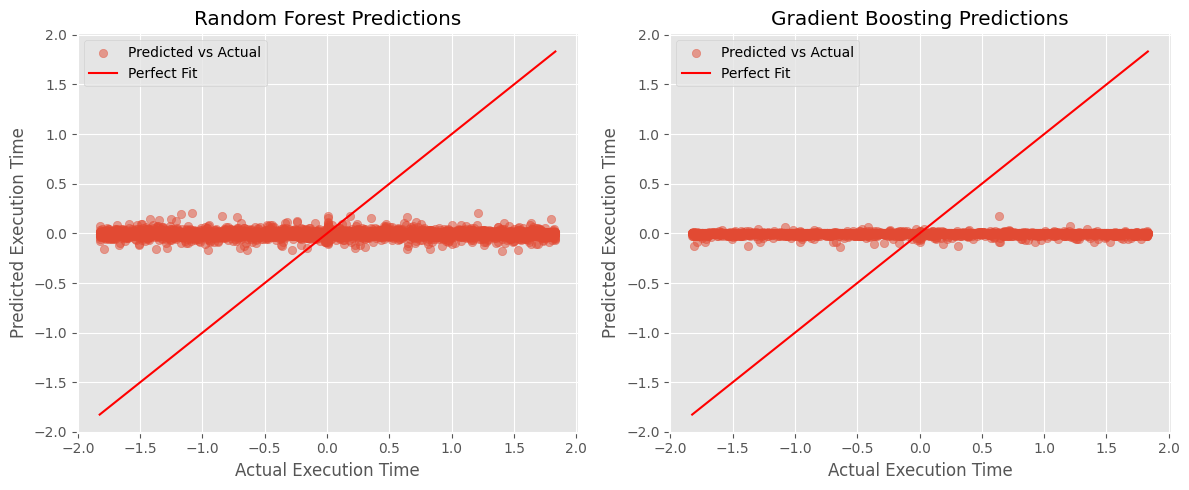

In [18]:
import matplotlib.pyplot as plt

# Scatter plot for predictions vs actual values
plt.figure(figsize=(12, 5))

# Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_test_new, y_pred_rf, alpha=0.5, label="Predicted vs Actual")
plt.plot([min(y_test_new), max(y_test_new)], [min(y_test_new), max(y_test_new)], 'r', label="Perfect Fit")
plt.xlabel("Actual Execution Time")
plt.ylabel("Predicted Execution Time")
plt.title("Random Forest Predictions")
plt.legend()

# Gradient Boosting
plt.subplot(1, 2, 2)
plt.scatter(y_test_new, y_pred_gb, alpha=0.5, label="Predicted vs Actual")
plt.plot([min(y_test_new), max(y_test_new)], [min(y_test_new), max(y_test_new)], 'r', label="Perfect Fit")
plt.xlabel("Actual Execution Time")
plt.ylabel("Predicted Execution Time")
plt.title("Gradient Boosting Predictions")
plt.legend()

plt.tight_layout()
plt.show()
